In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Laterais_Brasileirao/laterais_santos.csv'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head()

,Jogador,Minutos,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,PPA,Crosses,SCA,CrsPA,GCA
0,G Escobar,1452,45,31,22,16,676,81.3,22,63,15,40,32,10,0
1,Souza,764,20,10,9,4,298,79.5,15,24,5,21,8,4,3


In [5]:
data.rename(columns={'Minutos': 'Minutes'}, inplace=True)

In [6]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['Cmp/90'] = (data['Cmp'] * 90) / (data['Minutes'])
data['Blocks/90'] = (data['Blocks'] * 90) / (data['Minutes'])
data['PassBlocks/90'] = (data['PassBlocks'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['PPA/90'] = (data['PPA'] * 90) / (data['Minutes'])
data['Crosses/90'] = (data['Crosses'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['CrsPA/90'] = (data['CrsPA'] * 90) / (data['Minutes'])
data['GCA/90'] = (data['GCA'] * 90) / (data['Minutes'])

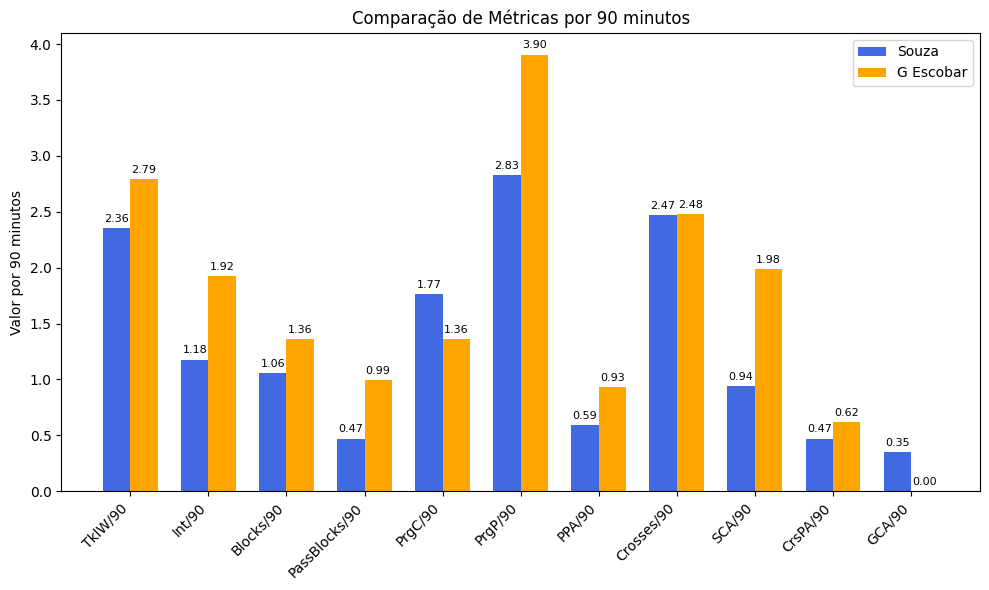

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que 'data' seja um DataFrame com os dados dos jogadores
# E que a coluna 'Player' identifique cada jogador

# Substitua pelos nomes reais dos jogadores
jogador_1 = 'Souza'
jogador_2 = 'G Escobar'

# Métricas a comparar
metricas = [
    'TklW/90', 'Int/90', 'Blocks/90', 'PassBlocks/90',
    'PrgC/90', 'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90'
]

# Extrair os dados dos dois jogadores
dados_1 = data[data['Jogador'] == jogador_1][metricas].iloc[0]
dados_2 = data[data['Jogador'] == jogador_2][metricas].iloc[0]

# Configurar gráfico
x = np.arange(len(metricas))  # posição no eixo x
largura = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Barras
bar1 = ax.bar(x - largura/2, dados_1, width=largura, label=jogador_1, color='royalblue')
bar2 = ax.bar(x + largura/2, dados_2, width=largura, label=jogador_2, color='orange')

# Ajustes de layout
ax.set_ylabel('Valor por 90 minutos')
ax.set_title('Comparação de Métricas por 90 minutos')
ax.set_xticks(x)
ax.set_xticklabels(metricas, rotation=45, ha='right')
ax.legend()

# Adiciona valores nas barras
def adicionar_valores(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

adicionar_valores(bar1)
adicionar_valores(bar2)

plt.tight_layout()
plt.show()


In [9]:
data['Cmp%'] = data['Cmp%'] / 100

In [10]:
data.columns

Index(['Jogador', 'Minutes', 'TklW', 'Int', 'Blocks', 'PassBlocks', 'Cmp',
       'Cmp%', 'PrgC', 'PrgP', 'PPA', 'Crosses', 'SCA', 'CrsPA', 'GCA',
       'TklW/90', 'Int/90', 'Cmp/90', 'Blocks/90', 'PassBlocks/90', 'PrgC/90',
       'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90'],
      dtype='object')

In [11]:
# Criando Métricas

# Defesa: tackles + interceptações + blocks + pass blocks
data['def_score'] = (
    data['TklW/90'] +
    data['Int/90'] +
    data['Blocks/90'] +
    data['PassBlocks/90']
)

# Construção: progressões de passe + passes para a área
data['build_score'] = (
    data['PrgP/90'] +
    data['PPA/90']
)

# Ataque: criação de chances + conduções + cruzamentos para a área
data['att_score'] = (
    data['SCA/90'] +
    data['PrgC/90'] +
    data['CrsPA/90'] +
    data['GCA/90']
)

# Score final simples (sem pesos por enquanto)
data['fba_score'] = data['def_score'] + data['build_score'] + data['att_score']

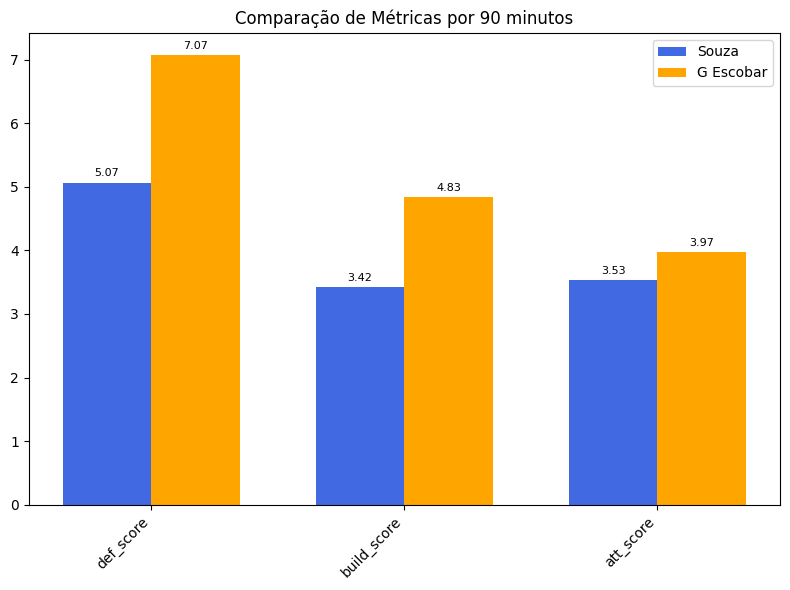

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que 'data' seja um DataFrame com os dados dos jogadores
# E que a coluna 'Player' identifique cada jogador

# Substitua pelos nomes reais dos jogadores
jogador_1 = 'Souza'
jogador_2 = 'G Escobar'

# Métricas a comparar
metricas = [
    'def_score', 'build_score', 'att_score'
]

# Extrair os dados dos dois jogadores
dados_1 = data[data['Jogador'] == jogador_1][metricas].iloc[0]
dados_2 = data[data['Jogador'] == jogador_2][metricas].iloc[0]

# Configurar gráfico
x = np.arange(len(metricas))  # posição no eixo x
largura = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Barras
bar1 = ax.bar(x - largura/2, dados_1, width=largura, label=jogador_1, color='royalblue')
bar2 = ax.bar(x + largura/2, dados_2, width=largura, label=jogador_2, color='orange')

# Ajustes de layout
ax.set_title('Comparação de Métricas por 90 minutos')
ax.set_xticks(x)
ax.set_xticklabels(metricas, rotation=45, ha='right')
ax.legend()

# Adiciona valores nas barras
def adicionar_valores(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

adicionar_valores(bar1)
adicionar_valores(bar2)

plt.tight_layout()
plt.show()
